# 火星全球构造图层概览 (Structural Features Overview)

本 Notebook 目标：
- 载入全球结构线要素。
- 浏览与展示核心属性字段。
- 进行统计：总长度、类型占比等。
- 绘制概览图。

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
shp_path = '../resources/SIM3292_MarsGlobalGeologicGIS_20M/SIM3292_Shapefiles/SIM3292_Global_Structure.shp'
gdf = gpd.read_file(shp_path)
gdf.head()

,OBJECTID,Morphology,Origin,Interpreta,Preservati,Dimension,Shape_Leng,SphLen_km,geometry
0,1,Trough,Fluvial,Channel axis,Subdued,Narrow,658249.412404,661.519,"LINESTRING (-55.319 -64.708, -55.155 -64.648, ..."
1,2,Trough,Fluvial,Channel axis,Partly Buried,Narrow,104730.532231,101.014,"LINESTRING (-24.551 -49.492, -24.65 -49.51, -2..."
2,3,Trough,Fluvial,Channel axis,Partly Buried,Narrow,125799.281577,121.662,"LINESTRING (-28.68 -51.136, -28.682 -51.137, -..."
3,4,Trough,Fluvial,Channel axis,Partly Buried,Narrow,196974.606344,211.708,"LINESTRING (-39.744 -43.769, -39.753 -43.732, ..."
4,5,Trough,Fluvial,Channel axis,Partly Buried,Narrow,107256.315814,116.892,"LINESTRING (-36.351 -43.29, -36.326 -43.264, -..."


In [8]:
print("数据行数:", len(gdf))
print("字段名:", gdf.columns.tolist())
print("几何类型:", gdf.geom_type.unique())
print("坐标参考系:", gdf.crs)

数据行数: 3593
字段名: ['OBJECTID', 'Morphology', 'Origin', 'Interpreta', 'Preservati', 'Dimension', 'Shape_Leng', 'SphLen_km', 'geometry']
几何类型: ['LineString' 'MultiLineString']
坐标参考系: GEOGCS["GCS_Mars_2000_Sphere",DATUM["Mars_2000_(Sphere)",SPHEROID["Mars_2000_Sphere_IAU_IAG",3396190,0],AUTHORITY["ESRI","106971"]],PRIMEM["Reference_Meridian",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [4]:
# 统计各形态类型（Morphology）的数量
morphology_counts = gdf['Morphology'].value_counts()
print("各形态类型数量：\n", morphology_counts)

# 统计各起源类型（Origin）的数量
origin_counts = gdf['Origin'].value_counts()
print("\n各起源类型数量：\n", origin_counts)

# 统计几何类型分布
geometry_counts = gdf.geom_type.value_counts()
print("\n几何类型分布：\n", geometry_counts)

# 统计Shape_Leng和SphLen_km的基本统计量
print("\nShape_Leng统计描述：")
print(gdf['Shape_Leng'].describe())
print("\nSphLen_km统计描述：")
print(gdf['SphLen_km'].describe())

各形态类型数量：
 Morphology
Ridge     2142
Trough    1451
Name: count, dtype: int64

各起源类型数量：
 Origin
Tectonic     1964
Fluvial       568
Erosional     464
Volcanic      324
Impact        246
Eolian         27
Name: count, dtype: int64

几何类型分布：
 LineString         3575
MultiLineString      18
Name: count, dtype: int64

Shape_Leng统计描述：
count    3.593000e+03
mean     2.296603e+05
std      1.987364e+05
min      5.641967e+04
25%      1.248405e+05
50%      1.714397e+05
75%      2.633622e+05
max      3.991238e+06
Name: Shape_Leng, dtype: float64

SphLen_km统计描述：
count    3593.000000
mean      216.275021
std       181.147601
min         0.000000
25%       127.670000
50%       168.344000
75%       250.411000
max      4282.960000
Name: SphLen_km, dtype: float64


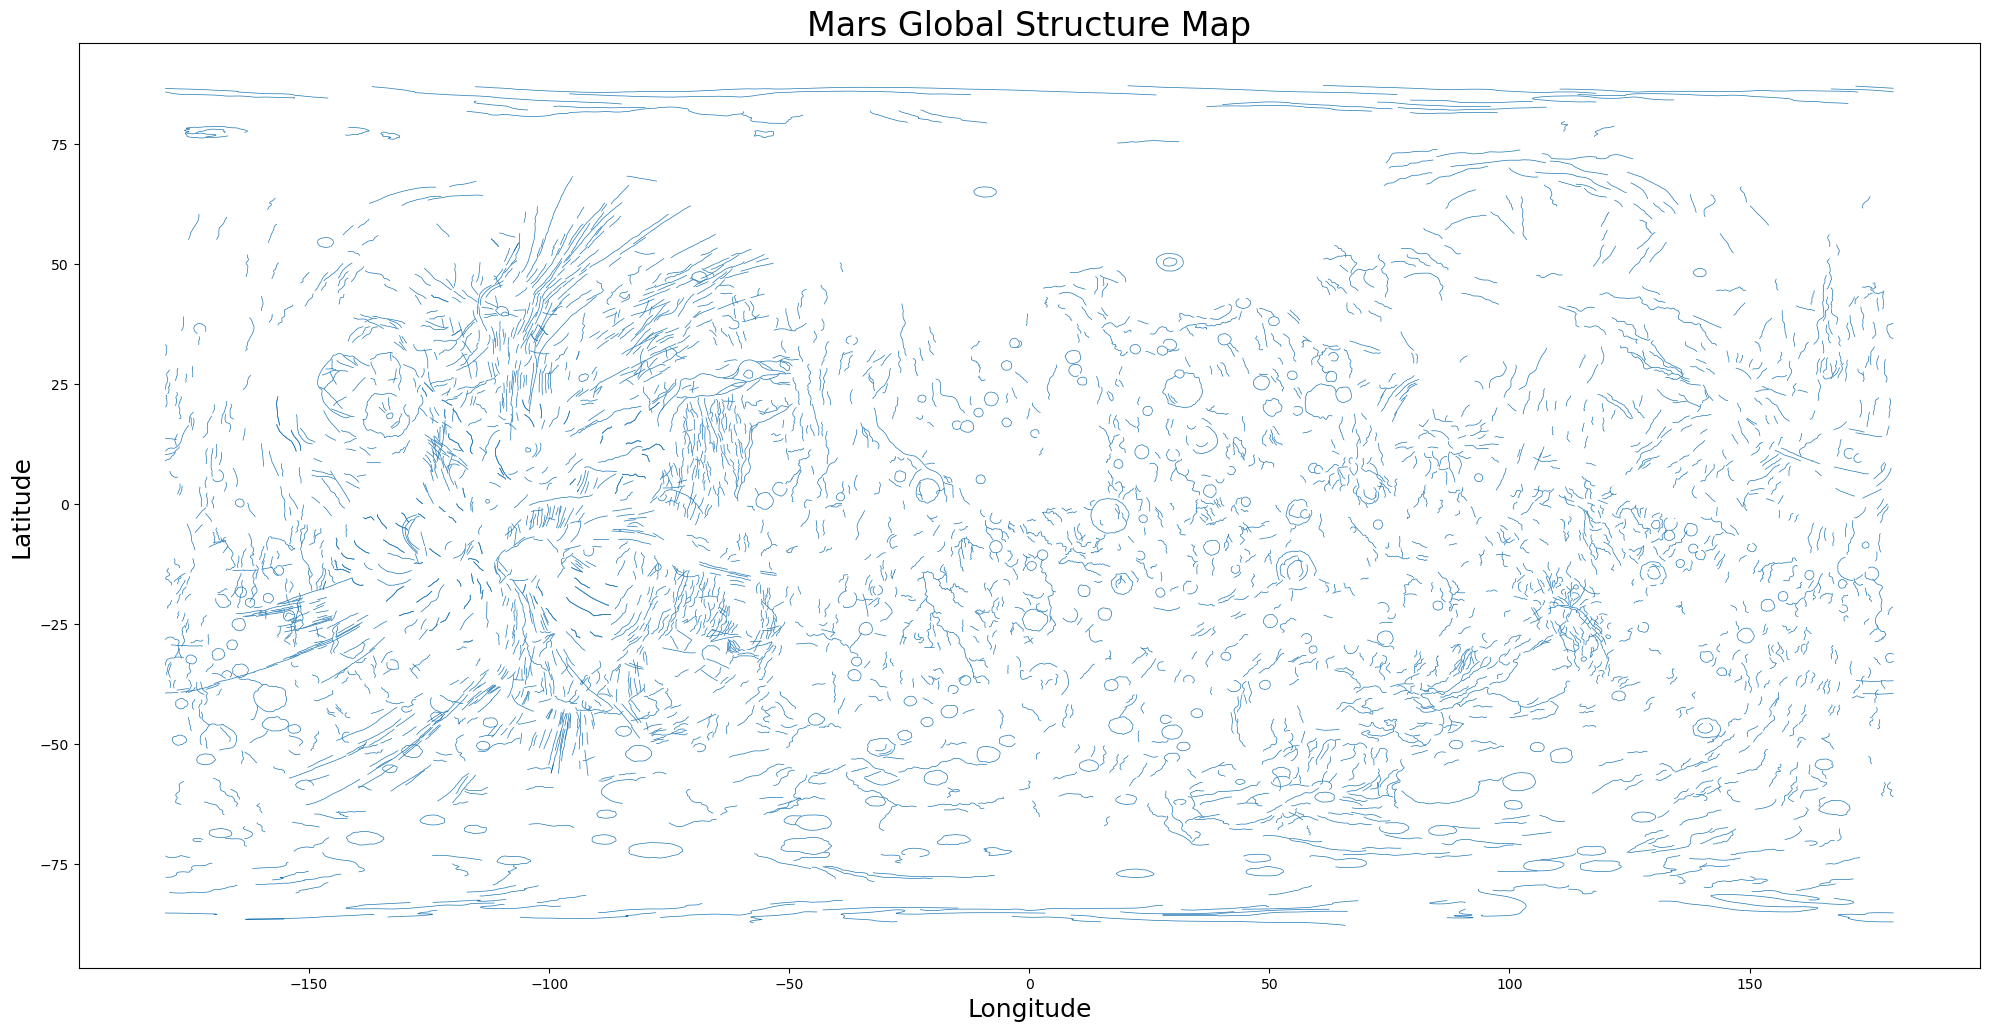

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
gdf.plot(ax=ax, linewidth=0.5)
ax.set_title("Mars Structure Map", fontsize=24)
ax.set_xlabel("Longitude", fontsize=18)
ax.set_ylabel("Latitude", fontsize=18)
plt.tight_layout()
plt.savefig('../output/images/mars_structure_map.png', dpi=600)
plt.show()
plt.close(fig)